### 目標　
変圧器のオイル温度を予測する

### カラム説明
- date：​記録日時

- HUFL：​High UseFul Load（高負荷時の有効負荷）

- HULL：​High UseLess Load（高負荷時の無効負荷）

- MUFL：​Medium UseFul Load（中負荷時の有効負荷）

- MULL：​Medium UseLess Load（中負荷時の無効負荷）

- LUFL：​Low UseFul Load（低負荷時の有効負荷）

- LULL：​Low UseLess Load（低負荷時の無効負荷）

- OT：​Oil Temperature（油温）

In [15]:
import pandas as pd
df=pd.read_csv("ett.csv")

### データの欠損値や統計情報を確認

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17420 entries, 0 to 17419
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    17420 non-null  object 
 1   HUFL    17420 non-null  float64
 2   HULL    17420 non-null  float64
 3   MUFL    17420 non-null  float64
 4   MULL    17420 non-null  float64
 5   LUFL    17420 non-null  float64
 6   LULL    17420 non-null  float64
 7   OT      17420 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [17]:
df.describe()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
count,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000
mean,7.375141,2.242242,4.300239,0.881568,3.066062,0.856932,13.324672
std,7.067744,2.042342,6.826978,1.809293,1.164506,0.599552,8.566946
min,-22.705999,-4.756000,-25.087999,-5.934000,-1.188000,-1.371000,-4.080000
25%,5.827000,0.737000,3.296000,-0.284000,2.315000,0.670000,6.964000
50%,8.774000,2.210000,5.970000,0.959000,2.833000,0.975000,11.396000
75%,11.788000,3.684000,8.635000,2.203000,3.625000,1.218000,18.079000
max,23.643999,10.114000,17.341000,7.747000,8.498000,3.046000,46.007000


### dateカラム以外を対象としたペアプロットを表示

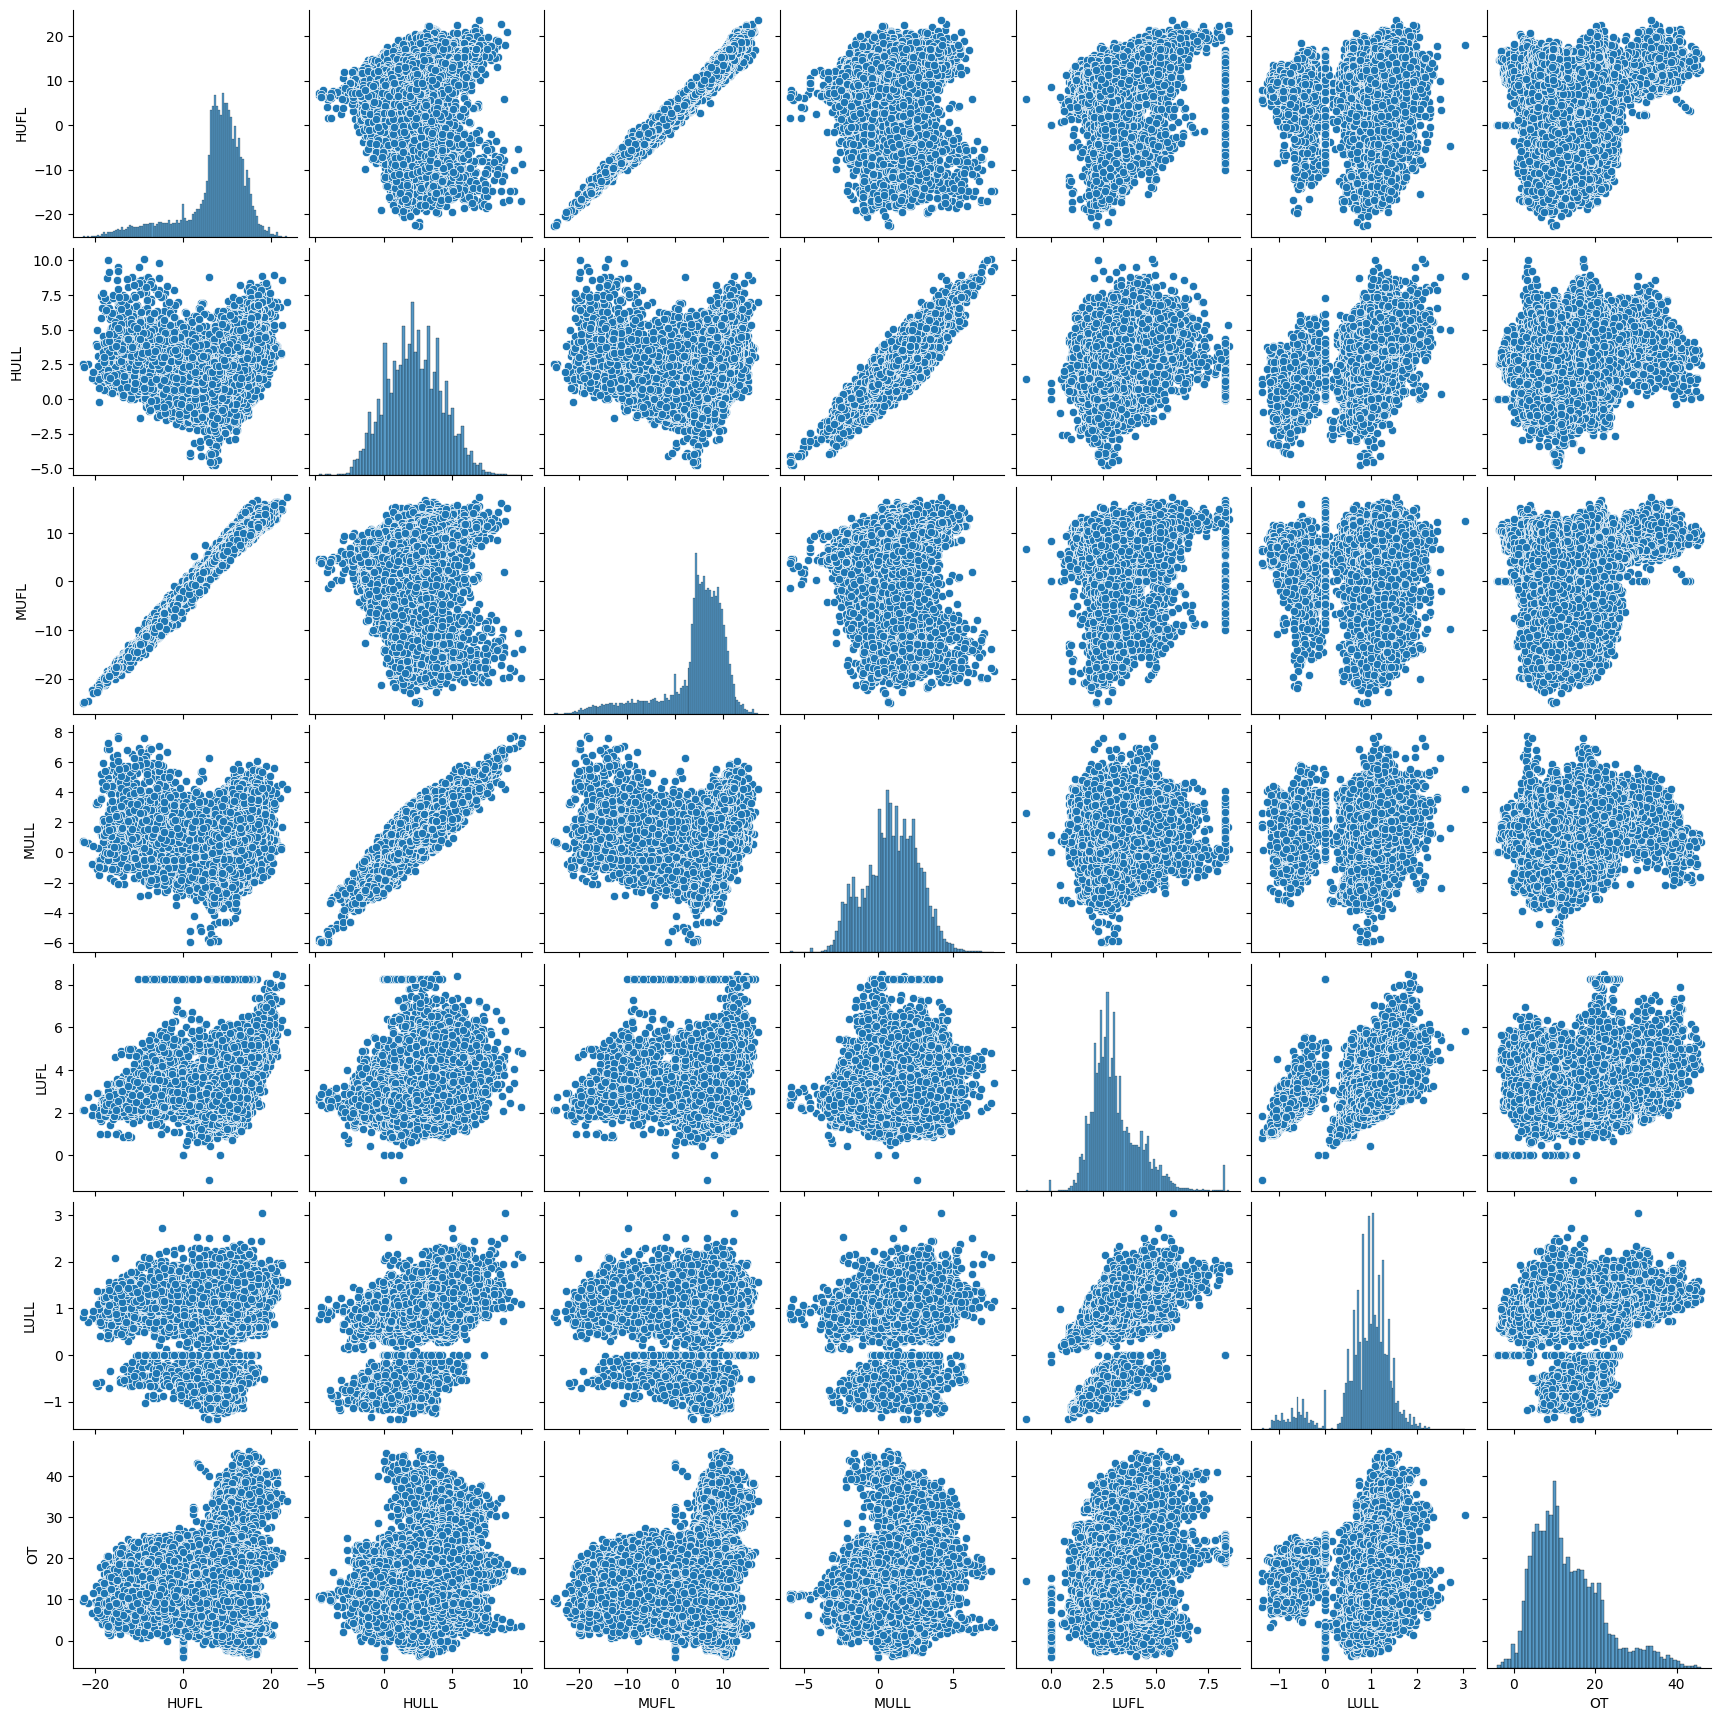

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# ペアプロットの作成
sns.pairplot(df)
# グラフを表示
plt.show()


### 各カラムの相関係数をヒートマップで表示

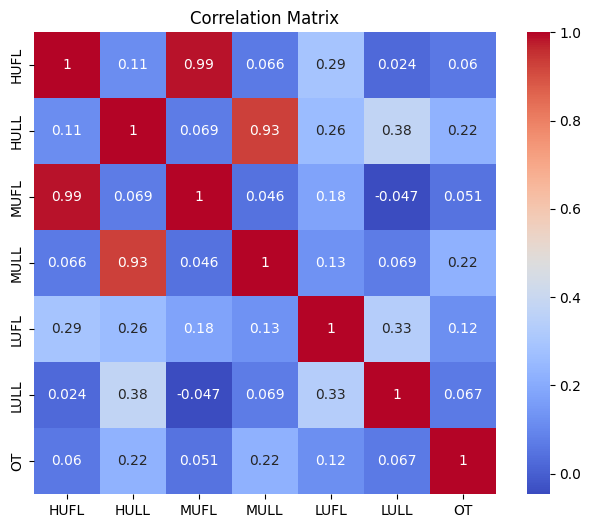

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 相関係数を計算
corr = df.corr(numeric_only=True)
# ヒートマップを描画
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()


### "date"カラムを学習で用いるためdatetime型に変換

In [20]:
# object型をdatetime型に変換
df['date'] = pd.to_datetime(df['date'])

# 結果の確認
print(df['date'].dtype)
print(df)

datetime64[ns]
                     date    HUFL   HULL   MUFL   MULL   LUFL   LULL  \
0     2016-07-01 00:00:00   5.827  2.009  1.599  0.462  4.203  1.340   
1     2016-07-01 01:00:00   5.693  2.076  1.492  0.426  4.142  1.371   
2     2016-07-01 02:00:00   5.157  1.741  1.279  0.355  3.777  1.218   
3     2016-07-01 03:00:00   5.090  1.942  1.279  0.391  3.807  1.279   
4     2016-07-01 04:00:00   5.358  1.942  1.492  0.462  3.868  1.279   
...                   ...     ...    ...    ...    ...    ...    ...   
17415 2018-06-26 15:00:00  -1.674  3.550 -5.615  2.132  3.472  1.523   
17416 2018-06-26 16:00:00  -5.492  4.287 -9.132  2.274  3.533  1.675   
17417 2018-06-26 17:00:00   2.813  3.818 -0.817  2.097  3.716  1.523   
17418 2018-06-26 18:00:00   9.243  3.818  5.472  2.097  3.655  1.432   
17419 2018-06-26 19:00:00  10.114  3.550  6.183  1.564  3.716  1.462   

              OT  
0      30.531000  
1      27.787001  
2      27.787001  
3      25.044001  
4      21.948000  
...   

### データセットには２年分のデータが格納されているため１年分ずつデータを描画する

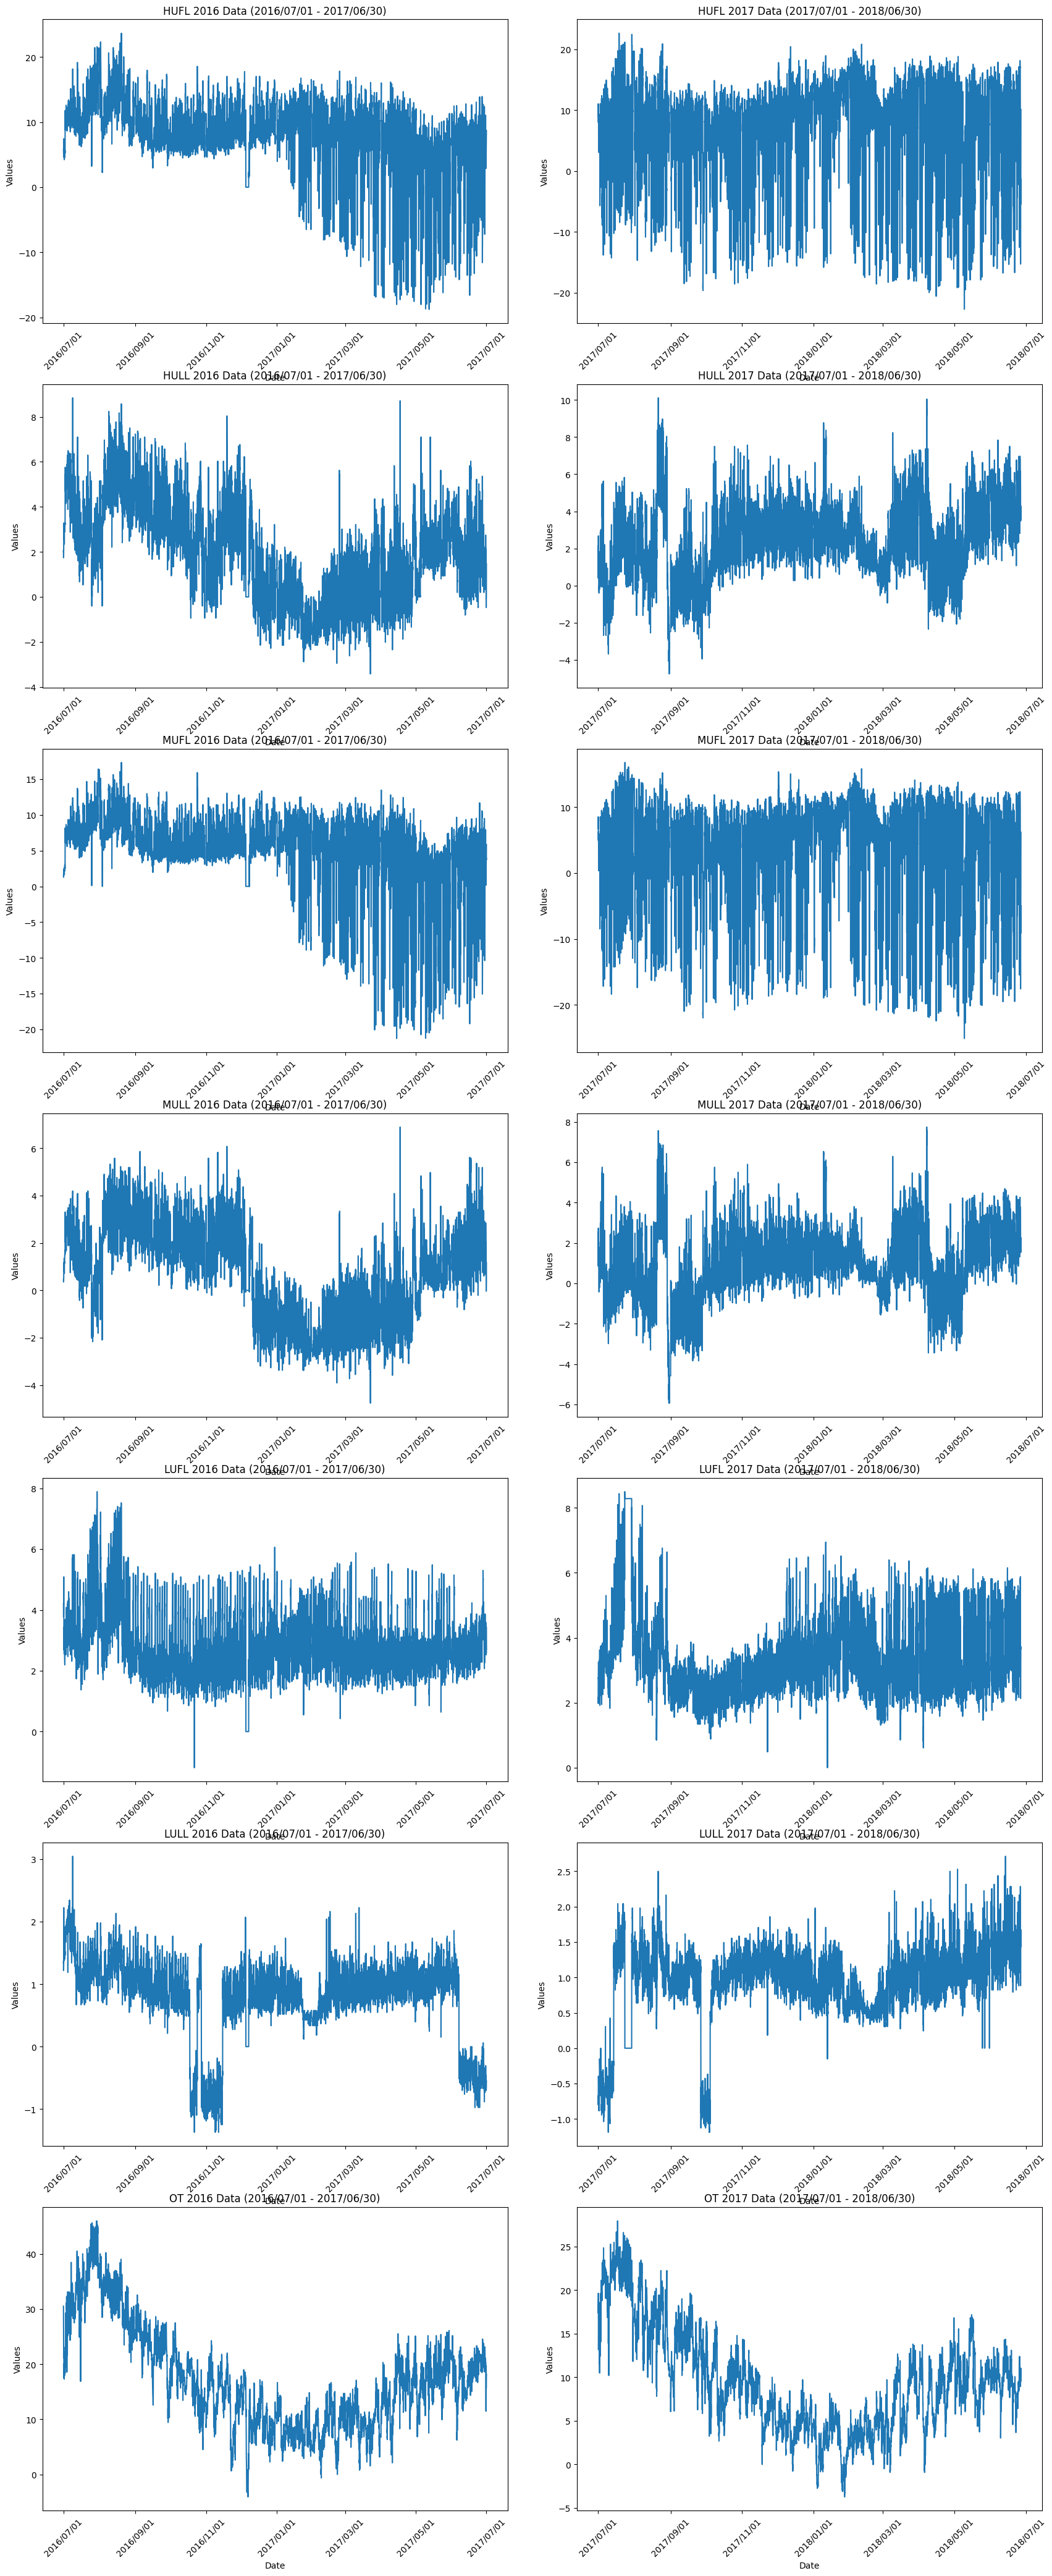

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# もし 'date' カラムがまだ datetime 型でなければ、変換します
df['date'] = pd.to_datetime(df['date'])

# 2016/07/01 からの2年間のデータを切り出す
start_date = '2016-07-01'
end_date = '2018-06-30'

df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# 2016年7月1日から2017年6月30日までのデータを抽出
df_2016 = df_filtered[df_filtered['date'] < '2017-07-01']

# 2017年7月1日から2018年6月30日までのデータを抽出
df_2017 = df_filtered[df_filtered['date'] >= '2017-07-01']

# カラムごとにプロットを作成
columns = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT']

# プロットの設定
fig, axes = plt.subplots(len(columns), 2, figsize=(18, len(columns)*6))  # 横長に設定
fig.tight_layout(pad=5.0)

# 各カラムについて、2016年と2017年のデータをプロット
for i, col in enumerate(columns):
    # 2016年のデータ
    axes[i, 0].plot(df_2016['date'], df_2016[col], label=f'{col} 2016')
    axes[i, 0].set_title(f'{col} 2016 Data (2016/07/01 - 2017/06/30)')
    axes[i, 0].set_xlabel('Date')
    axes[i, 0].set_ylabel('Values')
    axes[i, 0].xaxis.set_major_formatter(DateFormatter('%Y/%m/%d'))
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    # 2017年のデータ
    axes[i, 1].plot(df_2017['date'], df_2017[col], label=f'{col} 2017')
    axes[i, 1].set_title(f'{col} 2017 Data (2017/07/01 - 2018/06/30)')
    axes[i, 1].set_xlabel('Date')
    axes[i, 1].set_ylabel('Values')
    axes[i, 1].xaxis.set_major_formatter(DateFormatter('%Y/%m/%d'))
    axes[i, 1].tick_params(axis='x', rotation=45)

# グラフを表示
plt.show()


### 出力結果より季節性またはトレンド性が見られたカラムをピックアップ
- OT(​Oil Temperature（油温）)<br>
2年間にわたり類似したグラフを描いていることから季節性が強い特徴であることが読み取れる。
- LUFL,LULL<br>
２年間のグラフの推移に類似性が若干みられるため中程度の季節性を持つデータなのではないかと考えられる。
- MUFL&HUFL<br>
2カラムの間に高い相関係数、同期間でのグラフに強い類似性がみられるためデータセットをまとめるまたは片方の列を削除することが検討される。
- MULL&HULL<br>
同様に2カラムの間に高い相関係数、同期間でのグラフに強い類似性がみられるためデータセットをまとめるまたは片方の列を削除することが検討される。

### 多重共線性を考慮し相関係数が高いカラムを２カラムの平均値を入力した１カラムに結合する

In [22]:
# MUFLとHUFLの平均 → 新しい列 'FL_avg'
df['FL_avg'] = df[['MUFL', 'HUFL']].mean(axis=1)

# MULLとHULLの平均 → 新しい列 'LL_avg'
df['LL_avg'] = df[['MULL', 'HULL']].mean(axis=1)


In [23]:
df2 = df.drop(columns=['MUFL', 'HUFL', 'MULL', 'HULL'])  # ← inplace=False（デフォルト）


In [24]:
df2.head()

,date,LUFL,LULL,OT,FL_avg,LL_avg
0,2016-07-01 00:00:00,4.203,1.340,30.531000,3.7130,1.2355
1,2016-07-01 01:00:00,4.142,1.371,27.787001,3.5925,1.2510
2,2016-07-01 02:00:00,3.777,1.218,27.787001,3.2180,1.0480
3,2016-07-01 03:00:00,3.807,1.279,25.044001,3.1845,1.1665
4,2016-07-01 04:00:00,3.868,1.279,21.948000,3.4250,1.2020


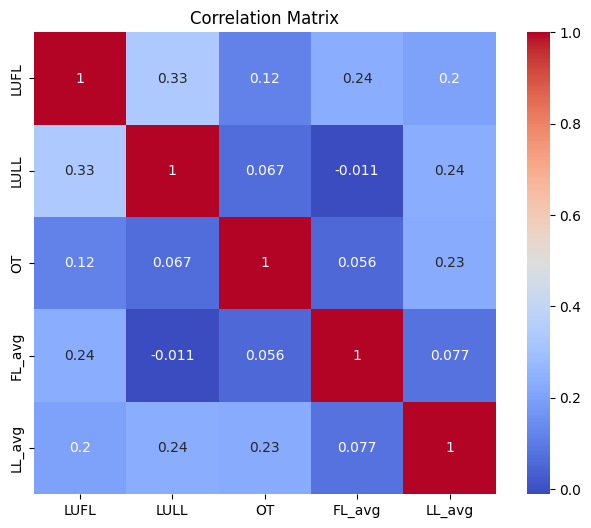

In [25]:
# 相関係数を計算
corr = df2.corr(numeric_only=True)
# ヒートマップを描画
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

## Autoformerによる回帰モデル作成

In [15]:
import os
import sys

# 現在の作業ディレクトリを取得
current_dir = os.getcwd()

sys.path.append(os.path.join(current_dir, 'Autoformer'))
from models.Autoformer import Model as Autoformer


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import os
import sys

# GPU設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 現在の作業ディレクトリを取得
current_dir = os.getcwd()
sys.path.append(os.path.join(current_dir, 'Autoformer'))

from models.Autoformer import Model as Autoformer
df3=df2
# 時間の特徴量を追加
df3['hour'] = df2['date'].dt.hour
df3['dayofweek'] = df2['date'].dt.dayofweek
df3['month'] = df2['date'].dt.month
df3['year'] = df2['date'].dt.year

# 不要なdate列を削除
df3 = df3.drop(columns=['date'])

# 特徴量の標準化
scaler = StandardScaler()
features = ['LUFL', 'LULL', 'FL_avg', 'LL_avg']
df3[features] = scaler.fit_transform(df3[features])

# 時系列特徴量を標準化
time_features = ['hour', 'dayofweek', 'month', 'year']
df3[time_features] = scaler.fit_transform(df3[time_features])

# 特徴量とラベルの分割
X = df3[features].values
y = df3['OT'].values
time_feat = df3[time_features].values

In [27]:
df3.head()

,LUFL,LULL,OT,FL_avg,LL_avg,hour,dayofweek,month,year
0,0.976355,0.805738,30.531000,-0.306807,-0.172507,-1.661205,0.498481,0.136212,-1.404424
1,0.923970,0.857445,27.787001,-0.324207,-0.164315,-1.516724,0.498481,0.136212,-1.404424
2,0.610524,0.602247,27.787001,-0.378285,-0.271602,-1.372242,0.498481,0.136212,-1.404424
3,0.636286,0.703993,25.044001,-0.383123,-0.208974,-1.227761,0.498481,0.136212,-1.404424
4,0.688671,0.703993,21.948000,-0.348394,-0.190212,-1.083279,0.498481,0.136212,-1.404424


In [28]:
df3.describe()

,LUFL,LULL,OT,FL_avg,LL_avg,hour,dayofweek,month,year
count,1.742000e+04,1.742000e+04,17420.000000,1.742000e+04,1.742000e+04,1.742000e+04,1.742000e+04,1.742000e+04,1.742000e+04
mean,-9.463026e-17,7.831470e-17,13.324672,5.873602e-17,-1.957867e-17,4.700921e-17,-2.080234e-17,-3.915735e-17,-1.506514e-13
std,1.000029e+00,1.000029e+00,8.566946,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00
min,-3.653209e+00,-3.716103e+00,-4.080000,-4.293711e+00,-3.641090e+00,-1.661205e+00,-1.499113e+00,-1.599145e+00,-1.404424e+00
25%,-6.449804e-01,-3.117954e-01,6.964000,-1.806006e-01,-6.870073e-01,-9.387980e-01,-9.997145e-01,-7.314665e-01,-1.404424e+00
50%,-2.001439e-01,1.969325e-01,11.396000,2.255265e-01,1.511258e-02,-7.190899e-02,-9.173796e-04,1.362119e-01,1.400516e-02
75%,4.799924e-01,6.022470e-01,18.079000,6.325380e-01,7.127402e-01,7.949800e-01,9.978797e-01,1.003890e+00,1.400516e-02
max,4.664720e+00,3.651278e+00,46.007000,2.116165e+00,3.847308e+00,1.661869e+00,1.497278e+00,1.582342e+00,1.432435e+00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# デバイス設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Config設定
class Configs:
    def __init__(self):
        self.seq_len = 96        # 入力の時系列長
        self.label_len = 48      # デコーダのヒント長（必須）
        self.pred_len = 24       # 予測したい長さ
        self.enc_in = 4          # 入力の特徴量数（LUFL, LULL, FL_avg, LL_avg）
        self.dec_in = 4          # 出力特徴量（OT）だけ
        self.c_out = 1           # 出力次元（予測対象数）
        self.e_layers = 2        # encoder層
        self.d_layers = 1        # decoder層
        self.d_model = 512       # 隠れ層の次元
        self.moving_avg = 25     # series decompositionで使うwindowサイズ
        self.embed = 'timeF'     # 埋め込み方法
        self.freq = 'h'          # 時間の頻度
        self.dropout = 0.1       # ドロップアウト
        self.n_heads = 8         # 注意機構のヘッド数
        self.d_ff = 512          # フィードフォワード層の次元
        self.factor = 5          # 相関の因子
        self.output_attention = False  # attentionの出力を有効にするかどうか
        self.activation = "relu"  # 活性化関数（例："relu"）

configs = Configs()
# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
time_feat_train, time_feat_test = train_test_split(time_feat, test_size=0.2, shuffle=False)

# データセットクラス
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, time_features, seq_len, label_len, pred_len):
        self.X = X
        self.y = y
        self.time_features = time_features
        self.seq_len = seq_len
        self.label_len = label_len
        self.pred_len = pred_len

    def __len__(self):
        return len(self.X) - self.seq_len - self.pred_len

    def __getitem__(self, idx):
        X_seq = self.X[idx:idx+self.seq_len]
        y_seq = self.y[idx+self.seq_len:idx+self.seq_len+self.pred_len]
        x_mark_enc = self.time_features[idx:idx+self.seq_len]
        x_mark_dec = self.time_features[idx+self.seq_len-self.label_len:idx+self.seq_len+self.pred_len]

        return (
            torch.tensor(X_seq, dtype=torch.float32),
            torch.tensor(y_seq, dtype=torch.float32).unsqueeze(-1),
            torch.tensor(x_mark_enc, dtype=torch.float32),
            torch.tensor(x_mark_dec, dtype=torch.float32)
        )

# データローダー
train_dataset = TimeSeriesDataset(X_train, y_train, time_feat_train, 
                                 seq_len=configs.seq_len, 
                                 label_len=configs.label_len, 
                                 pred_len=configs.pred_len)
test_dataset = TimeSeriesDataset(X_test, y_test, time_feat_test, 
                                seq_len=configs.seq_len, 
                                label_len=configs.label_len, 
                                pred_len=configs.pred_len)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

# モデルの定義
model = Autoformer(configs).to(device)

# 損失関数と最適化手法
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 訓練関数
def train_model(model, train_loader, criterion, optimizer, epochs=1000):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0.0
        for i, (X_batch, y_batch, x_mark_enc, x_mark_dec) in enumerate(train_loader):
            X_batch = X_batch.to(device)                            # [B, seq_len, enc_in]
            y_batch = y_batch.to(device)                            # [B, pred_len, 1]
            x_mark_enc = x_mark_enc.to(device)                      # [B, seq_len, 4]
            x_mark_dec = x_mark_dec.to(device)                      # [B, label_len+pred_len, 4]

            optimizer.zero_grad()

            # decoder 入力を encoder 入力と同じ特徴量次元に揃える
            dec_input = torch.zeros(y_batch.size(0), configs.pred_len, X_batch.size(-1)).float().to(device)
            dec_input = torch.cat([X_batch[:, -configs.label_len:, :], dec_input], dim=1)  # [B, label_len+pred_len, enc_in]

            # モデル予測
            outputs = model(X_batch, x_mark_enc, dec_input, x_mark_dec)

            # 損失計算と更新
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}')

# モデルの訓練
train_model(model, train_loader, criterion, optimizer, epochs=1000)

# 評価関数
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for X_batch, y_batch, x_mark_enc, x_mark_dec in test_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            x_mark_enc = x_mark_enc.to(device)
            x_mark_dec = x_mark_dec.to(device)

            # decoder 入力を準備
            dec_input = torch.zeros(y_batch.size(0), configs.pred_len, X_batch.size(-1)).float().to(device)
            dec_input = torch.cat([X_batch[:, -configs.label_len:, :], dec_input], dim=1)

            outputs = model(X_batch, x_mark_enc, dec_input, x_mark_dec)

            # 損失計算
            loss = criterion(outputs, y_batch)
            test_loss += loss.item()

    print(f'Test Loss: {test_loss / len(test_loader):.4f}')


Epoch 1/1000, Loss: 50.2951
Epoch 2/1000, Loss: 44.5348
Epoch 3/1000, Loss: 39.5817
Epoch 4/1000, Loss: 41.4220
Epoch 5/1000, Loss: 42.0727
Epoch 6/1000, Loss: 44.8562
Epoch 7/1000, Loss: 43.4189
Epoch 8/1000, Loss: 43.0519
Epoch 9/1000, Loss: 43.1777
Epoch 10/1000, Loss: 40.7877
Epoch 11/1000, Loss: 38.4425
Epoch 12/1000, Loss: 38.5102
Epoch 13/1000, Loss: 36.8352
Epoch 14/1000, Loss: 36.0178
Epoch 15/1000, Loss: 37.6888
Epoch 16/1000, Loss: 31.2457
Epoch 17/1000, Loss: 28.0108
Epoch 18/1000, Loss: 24.8445
Epoch 19/1000, Loss: 22.4224
Epoch 20/1000, Loss: 21.9144
Epoch 21/1000, Loss: 20.7237
Epoch 22/1000, Loss: 20.6155
Epoch 23/1000, Loss: 19.8882
Epoch 24/1000, Loss: 20.0400
Epoch 25/1000, Loss: 18.8635
Epoch 26/1000, Loss: 19.3978
Epoch 27/1000, Loss: 47.6275
Epoch 28/1000, Loss: 18.1727
Epoch 29/1000, Loss: 18.2120
Epoch 30/1000, Loss: 17.2966
Epoch 31/1000, Loss: 17.1260
Epoch 32/1000, Loss: 17.4700
Epoch 33/1000, Loss: 17.3019
Epoch 34/1000, Loss: 16.6060
Epoch 35/1000, Loss: 17

KeyboardInterrupt: 

### ※学習結果を表示するために残していますがモデル学習の際にロードしていた一時保存されたモデルは削除しています

In [23]:
# モデルとオプティマイザを再定義
model = Autoformer(configs).to(device)
optimizer = optim.Adam(model.parameters(), lr=5e-3)


# モデルとオプティマイザの状態を読み込む
model.load_state_dict(torch.load(model_path))
optimizer.load_state_dict(torch.load(optimizer_path))

# 再度学習を開始
train_model(model, train_loader, criterion, optimizer, epochs=100)


c:\Users\eiryo\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([32, 24, 1])) that is different to the input size (torch.Size([32, 24, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/100, Loss: 12.5773
Epoch 2/100, Loss: 12.1329
Epoch 3/100, Loss: 12.2182
Epoch 4/100, Loss: 12.4661
Epoch 5/100, Loss: 12.0414
Epoch 6/100, Loss: 12.1482
Epoch 7/100, Loss: 12.5381
Epoch 8/100, Loss: 12.1560
Epoch 9/100, Loss: 12.1583
Epoch 10/100, Loss: 12.5669
Epoch 11/100, Loss: 12.4648
Epoch 12/100, Loss: 12.1615
Epoch 13/100, Loss: 11.9828
Epoch 14/100, Loss: 12.0591
Epoch 15/100, Loss: 11.9641
Epoch 16/100, Loss: 12.1037
Epoch 17/100, Loss: 11.9369
Epoch 18/100, Loss: 11.9774
Epoch 19/100, Loss: 12.2733
Epoch 20/100, Loss: 12.1254
Epoch 21/100, Loss: 12.1150
Epoch 22/100, Loss: 12.0352
Epoch 23/100, Loss: 12.0360
Epoch 24/100, Loss: 12.0422
Epoch 25/100, Loss: 12.1322
Epoch 26/100, Loss: 12.0105
Epoch 27/100, Loss: 11.8448
Epoch 28/100, Loss: 12.1481
Epoch 29/100, Loss: 11.8735
Epoch 30/100, Loss: 11.8868
Epoch 31/100, Loss: 11.6839
Epoch 32/100, Loss: 11.9713
Epoch 33/100, Loss: 11.8319
Epoch 34/100, Loss: 11.6981
Epoch 35/100, Loss: 11.6802
Epoch 36/100, Loss: 58.3244
E

### 保存されたAutoformerモデルをロードする

In [ ]:
import torch
import os

model = Autoformer(configs).to(device)


# 相対パスでモデルを読み込み
model_path = os.path.join("models", "best_model.pth")
model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))


## SVMによる回帰モデル作成(モデル比較に使用)

In [29]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


X = df3[["LUFL", "LULL", "FL_avg", "LL_avg"]].values
y = df3["OT"].values

In [30]:
from sklearn.model_selection import GridSearchCV

# ==== 学習データとテストデータに分割 ====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(SVR(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 100, 'epsilon': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}


In [31]:

# ==== 最適パラメータで再学習 ====
best_svr = grid_search.best_estimator_
best_svr.fit(X_train, y_train)

# ==== 予測と評価 ====
y_pred = best_svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")

📉 Mean Squared Error (MSE): 48.6069


### 保存されたSVMモデルをロードする

In [ ]:
# ロード（相対パス）
import joblib

# モデルロード
model_path = os.path.join("models2", "best_svr_model.pkl")
loaded_model = joblib.load(model_path)

# 予測もすぐできる
y_pred_loaded = loaded_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_loaded)
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
